In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
total=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\60天统计\间隔_5min_init.npy',allow_pickle=True).item()
info=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\60天统计\路段信息_简略.npy',allow_pickle=True).item()

In [3]:
targets=[]
with open(r'C:\Users\e-wel\Desktop\点位.txt','r',errors='ignore',encoding='utf-8') as status_file:
    line_list=status_file.readlines()
    for line in line_list:
        line=line.split(' ')
        targets.append(int(line[0]))

(array([5.87060565e-03, 8.78008470e-03, 1.50552629e-02, 8.69400544e-03,
        2.98695038e-03, 1.12763833e-03, 3.78748752e-04, 2.06590228e-04,
        1.37726819e-04, 7.74713356e-05, 1.72158524e-05, 0.00000000e+00,
        0.00000000e+00, 8.60792618e-06, 0.00000000e+00, 1.72158524e-05,
        8.60792618e-06, 0.00000000e+00, 8.60792618e-06, 8.60792618e-06]),
 array([ 92.  , 115.05, 138.1 , 161.15, 184.2 , 207.25, 230.3 , 253.35,
        276.4 , 299.45, 322.5 , 345.55, 368.6 , 391.65, 414.7 , 437.75,
        460.8 , 483.85, 506.9 , 529.95, 553.  ]),
 <BarContainer object of 20 artists>)

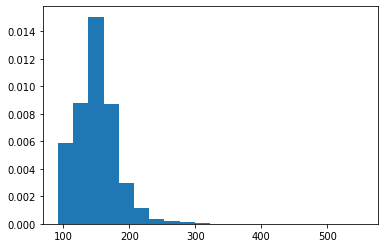

In [15]:
for seg in [148]:
    new_record=[]
    for i in range(28):
        new_record+=train[seg][i]
fig, ax = plt.subplots()
ax.hist(new_record, 20, density=1)

In [12]:
for seg in [148]:
    new_record=[]
    for i in range(12):
        new_record+=validate[seg][i]

(array([1.30023641e-03, 1.53664303e-03, 4.49172577e-03, 1.34751773e-02,
        1.86761229e-02, 1.56422380e-02, 1.28053586e-02, 7.17100079e-03,
        3.70370370e-03, 2.04885737e-03, 1.26083530e-03, 8.27423168e-04,
        1.57604413e-04, 1.77304965e-03, 1.18203310e-04, 0.00000000e+00,
        7.88022065e-05, 0.00000000e+00, 0.00000000e+00, 3.94011032e-05]),
 array([ 92.  , 103.75, 115.5 , 127.25, 139.  , 150.75, 162.5 , 174.25,
        186.  , 197.75, 209.5 , 221.25, 233.  , 244.75, 256.5 , 268.25,
        280.  , 291.75, 303.5 , 315.25, 327.  ]),
 <BarContainer object of 20 artists>)

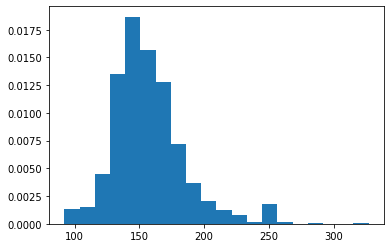

In [13]:
fig, ax = plt.subplots()
ax.hist(new_record, 20, density=1)

(array([4.39742250e-03, 8.70776733e-04, 4.74573319e-03, 1.46290491e-02,
        1.48467433e-02, 1.51515152e-02, 1.21037966e-02, 7.57575758e-03,
        5.35527691e-03, 1.82863114e-03, 1.30616510e-03, 9.14315569e-04,
        5.66004876e-04, 1.39324277e-03, 8.70776733e-05, 8.70776733e-05,
        4.35388366e-05, 8.70776733e-05, 1.74155347e-04, 4.35388366e-05]),
 array([ 92. , 103.6, 115.2, 126.8, 138.4, 150. , 161.6, 173.2, 184.8,
        196.4, 208. , 219.6, 231.2, 242.8, 254.4, 266. , 277.6, 289.2,
        300.8, 312.4, 324. ]),
 <BarContainer object of 20 artists>)

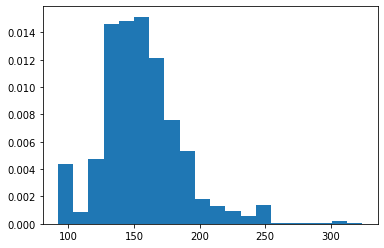

In [14]:
for seg in [148]:
    new_record=[]
    for i in range(11):
        new_record+=test[seg][i]
fig, ax = plt.subplots()
ax.hist(new_record, 20, density=1)

In [36]:
variance=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\60天统计\时间标准差均值.npy',allow_pickle=True).item()

In [46]:
speed_variance=numpy.load(r'C:\Users\e-wel\Documents\Python Scripts\60天统计\variance.npy',allow_pickle=True).item()

In [5]:
train={}
test={}
validate={}
for seg in targets:
    train[seg]=total[seg][2:34]
    test[seg]=total[seg][49:]
    validate[seg]=total[seg][34:46]

In [37]:
for seg in targets:
    time_arr=numpy.array(train[seg])
    day,record=time_arr.shape
    tmp_record=[variance[seg][0]]*record
    tmp_day=[tmp_record]*day
    mean=numpy.array(tmp_day)
    tmp_record=[variance[seg][1]]*record
    tmp_day=[tmp_record]*day
    std=numpy.array(tmp_day)
    print(seg,numpy.sum(numpy.where(numpy.absolute(time_arr-mean)>3*std,1,0))/day/record)

112 0.0359375
185 0.012152777777777778
186 0.0078125
192 0.009027777777777777
193 0.011805555555555555
272 0.02065972222222222
148 0.011284722222222222
188 0.011458333333333333
217 0.008333333333333333
225 0.003993055555555555


In [39]:
for seg in [188]:
    time_arr=numpy.array(train[seg])
    day,record=time_arr.shape
    tmp_record=[variance[seg][0]]*record
    tmp_day=[tmp_record]*day
    mean=numpy.array(tmp_day)
    tmp_record=[variance[seg][1]]*record
    tmp_day=[tmp_record]*day
    std=numpy.array(tmp_day)
    demo=numpy.where(numpy.absolute(time_arr-mean)>3*std)
    outliers_num=len(demo[0])


TypeError: 'int' object is not iterable

In [44]:
arr=numpy.array(train[188])
print(seg_len*3.6/numpy.max(arr),seg_len*3.6/numpy.min(arr))

17.92258064516129 43.863157894736844


In [ ]:
seg_len=float(info[str(188)][5])
outliers=[seg_len*3.6/train[seg][demo[0][i]][demo[1][i]] for i in range(outliers_num)]
outliers

In [ ]:
seg_list=list(seg_list)
seg_list_len=len(seg_list)
for seg_index in range(seg_list_len):
    for sub_index in range(seg_index+1):
        record_1=day_record[sub_index][:179]
        record_2=day_record[seg_index][1:180] #current time stamp
        plt.subplot(seg_list_len,seg_list_len,(seg_index*seg_list_len)+sub_index+1)
        plt.scatter(record_1,record_2,s=10,alpha=0.5)
        plt.title('cs:{},ns:{}'.format(seg_list[sub_index],seg_list[seg_index]))
        plt.xlabel('{}'.format(seg_list[sub_index]))
        plt.ylabel('{}'.format(seg_list[seg_index]))
    # plt.rcParams['figure.figsize']=(20,10)
plt.show()

In [ ]:
numpy.array(day_record[3]) # seg.43

In [ ]:
for day in range(8):
    # sub_fig=fig.subplot
    day_record=[]
    for seg in seg_list:
        day_record.append(in_1[seg][day*180:(day+1)*180])

In [ ]:
for seg_index in range(seg_list_len):
    for sub_index in range(seg_index+1):
        record_1=day_record[sub_index][:179]
        record_2=day_record[seg_index][1:180] #current time stamp
        plt.subplot(seg_list_len,seg_list_len,(seg_index*seg_list_len)+sub_index+1)
        plt.scatter(record_1,record_2,s=5,alpha=0.5)
        plt.title('cs:{},ns:{}'.format(seg_list[sub_index],seg_list[seg_index]))
        plt.xlabel('{}'.format(seg_list[sub_index]))
        plt.ylabel('{}'.format(seg_list[seg_index]))
    # plt.rcParams['figure.figsize']=(20,10)
plt.show()

## 周末 VS 工作日

In [4]:
weekdays_index=[2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 28, 29, 30, 31, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 49]

In [5]:
holidays_index=[0, 1, 46, 47, 48]

In [6]:
weekends_index=[5, 6, 12, 13, 19, 20, 26, 27, 32, 33, 39, 40, 46, 47, 48]

In [7]:
targets=[5, 3, 43, 44,46, 138, 34, 32, 297]
weekdays={}
weekends={}
holidays={}
for seg in targets:
    weekdays[seg]=[total[seg][i] for i in weekdays_index]
    weekends[seg]=[total[seg][i] for i in weekends_index]
    holidays[seg]=[total[seg][i] for i in holidays_index]

In [8]:
weekdays_mat={}
for seg in targets:
    tmp=numpy.array(weekdays[seg])
    weekdays_mat[seg]=numpy.around(numpy.mean(tmp,axis=0),2)

In [9]:
weekends_mat={}
for seg in targets:
    tmp=numpy.array(weekends[seg])
    weekends_mat[seg]=numpy.around(numpy.mean(tmp,axis=0),2)

In [10]:
holidays_mat={}
for seg in targets:
    tmp=numpy.array(holidays[seg])
    holidays_mat[seg]=numpy.around(numpy.mean(tmp,axis=0),2)

In [11]:
weekdays_sub_mat={}
for seg in weekdays_mat:
    new_record=[numpy.around(numpy.mean(weekdays_mat[seg][i*12:(i+1)*12]),2) for i in range(175//12)]
    weekdays_sub_mat[seg]=new_record

In [12]:
weekends_sub_mat={}
for seg in weekends_mat:
    new_record=[numpy.around(numpy.mean(weekends_mat[seg][i*12:(i+1)*12]),2) for i in range(175//12)]
    weekends_sub_mat[seg]=new_record

In [13]:
holidays_sub_mat={}
for seg in holidays_mat:
    new_record=[numpy.around(numpy.mean(holidays_mat[seg][i*12:(i+1)*12]),2) for i in range(175//12)]
    holidays_sub_mat[seg]=new_record

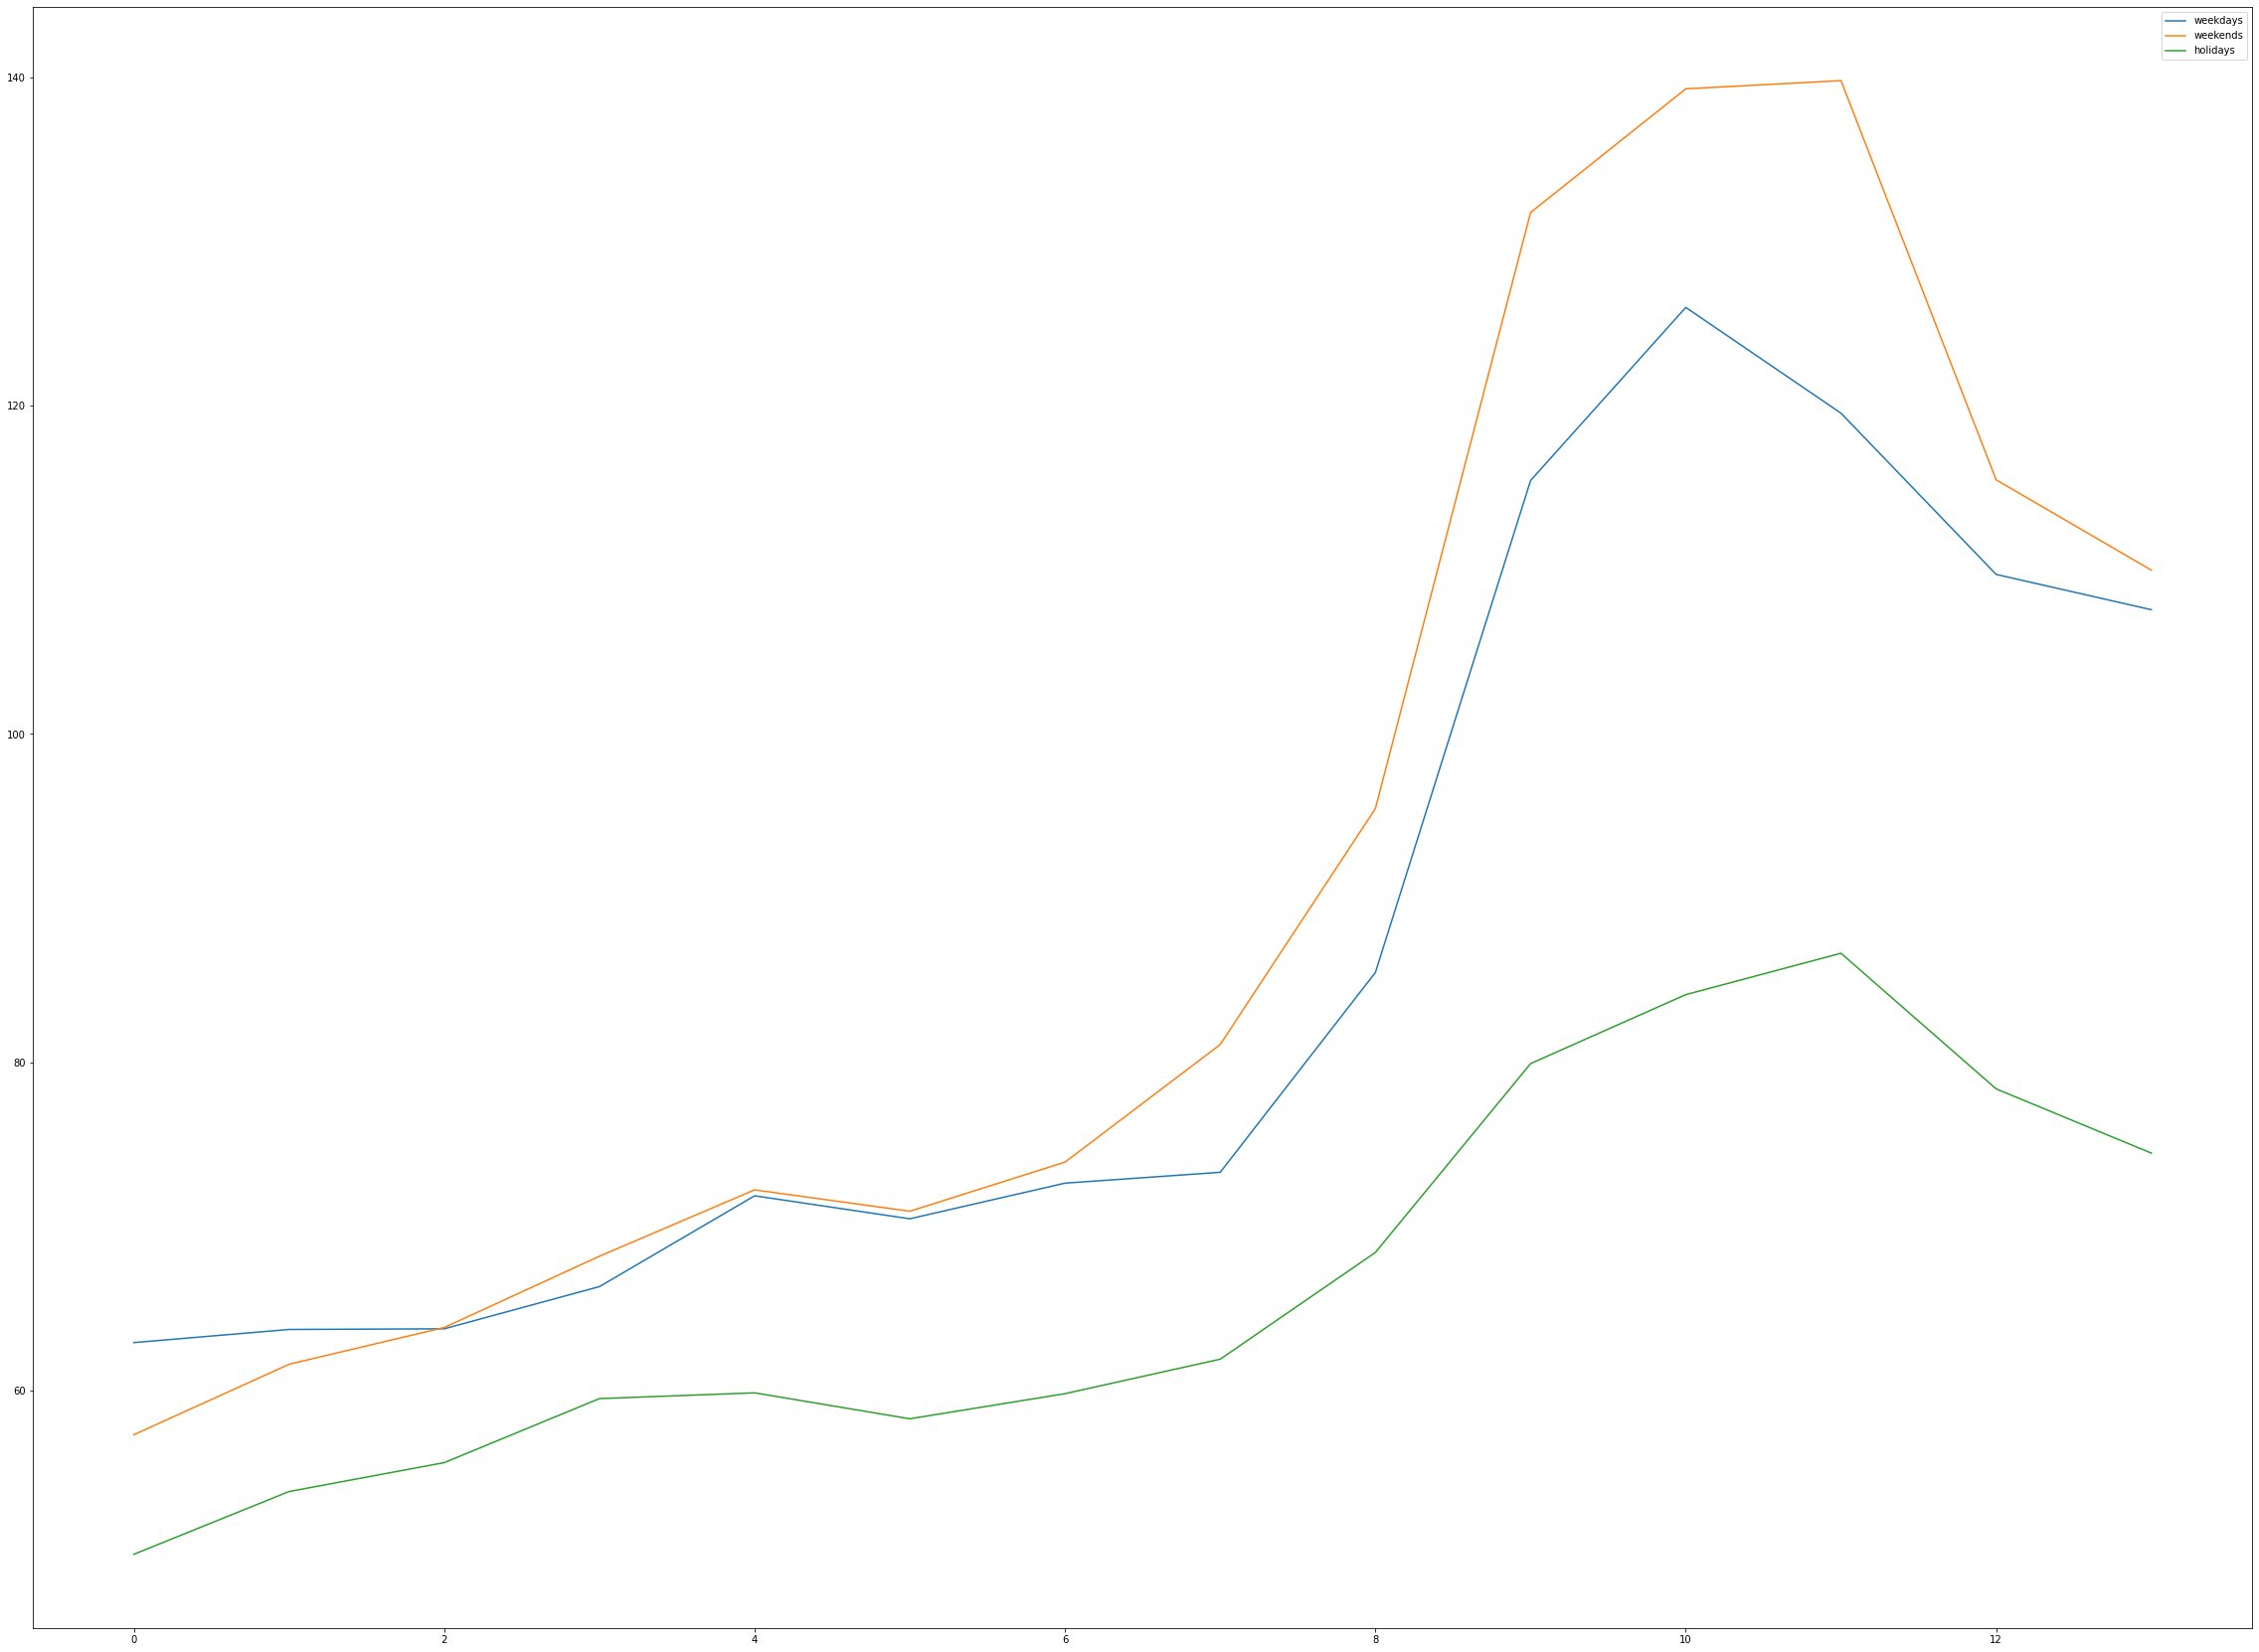

In [29]:

plt.rcParams['figure.figsize']=(40,30)
for seg in [297]:
    plt.plot([i for i in range(175//12)],weekdays_sub_mat[seg],label=str('weekdays'))
    plt.plot([i for i in range(175//12)],weekends_sub_mat[seg],label=str('weekends'))
    plt.plot([i for i in range(175//12)],holidays_sub_mat[seg],label=str('holidays'))
plt.legend()
plt.show()